In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Asset_price.csv')
df = df[::-1]

df.index = df['Date']
df.index = pd.to_datetime(df.index)

df = df[['Close']]
df = df.rename(columns={"Close": "s"})
df.s = df.s.apply(lambda x: x.replace(',', ''))
df.s = df.s.astype('float')
df

,s
Date,
2022-05-09,3991.24
2022-05-10,4001.05
2022-05-11,3935.18
2022-05-12,3930.08
2022-05-13,4023.89
...,...
2024-05-01,5018.39
2024-05-02,5064.20
2024-05-03,5127.79


In [2]:
df['sigma'] = 0
df['S'] = df['s'] / 1.35
df['dS'] = df['S'] - df['S'].shift(1)
df['RollM'] = df.s.rolling(window=30,min_periods=30).mean()
df['diff'] = df['s'] - df['RollM']
df['sigma'] = np.sqrt(df['diff'] * df['diff'] / 30)

df

,s,sigma,S,dS,RollM,diff
Date,,,,,,
2022-05-09,3991.24,NaN,2956.474074,NaN,NaN,NaN
2022-05-10,4001.05,NaN,2963.740741,7.266667,NaN,NaN
2022-05-11,3935.18,NaN,2914.948148,-48.792593,NaN,NaN
2022-05-12,3930.08,NaN,2911.170370,-3.777778,NaN,NaN
2022-05-13,4023.89,NaN,2980.659259,69.488889,NaN,NaN
...,...,...,...,...,...,...
2024-05-01,5018.39,21.704845,3717.325926,-12.814815,5137.272333,-118.882333
2024-05-02,5064.20,12.364837,3751.259259,33.933333,5131.925000,-67.725000
2024-05-03,5127.79,0.062745,3798.362963,47.103704,5128.133667,-0.343667


In [3]:
riskrate_df = pd.read_csv('Risk_rate.csv')
riskrate_df.index = pd.to_datetime(riskrate_df.Date)

riskrate_df = riskrate_df[['Close']]
riskrate_df = riskrate_df.rename(columns={"Close": "r"})

combined_df = df.join(riskrate_df, lsuffix='_caller', rsuffix='_other')
combined_df = combined_df.dropna()

combined_df.r = combined_df.r.apply(lambda x: x.replace('%', ''))
combined_df.r = combined_df.r.astype('float') / 100

combined_df['c'] = combined_df.r - 0.01


combined_df = combined_df[['s', 'sigma', 'S', 'dS', 'r', 'c']]
combined_df

,s,sigma,S,dS,r,c
Date,,,,,,
2022-06-21,3764.79,37.045945,2788.733333,66.629630,0.01642,0.00642
2022-06-22,3759.89,36.532608,2785.103704,-3.629630,0.01562,0.00562
2022-06-23,3795.73,28.739611,2811.651852,26.548148,0.01601,0.00601
2022-06-24,3911.74,7.416529,2897.585185,85.933333,0.01664,0.00664
2022-06-27,3900.11,9.357475,2888.970370,-8.614815,0.01669,0.00669
...,...,...,...,...,...,...
2024-05-01,5018.39,21.704845,3717.325926,-12.814815,0.05400,0.04400
2024-05-02,5064.20,12.364837,3751.259259,33.933333,0.05383,0.04383
2024-05-03,5127.79,0.062745,3798.362963,47.103704,0.05386,0.04386


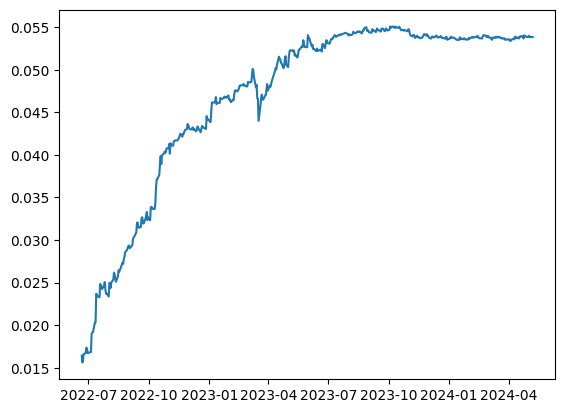

In [4]:
import matplotlib.pyplot as plt

plt.plot(combined_df['r'])

In [5]:
%pip install ruptures

Note: you may need to restart the kernel to use updated packages.


(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

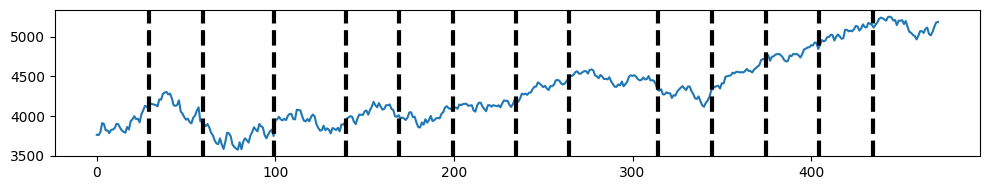

In [6]:
import ruptures as rpt

algo = rpt.Pelt(model="l2", min_size=28)
algo.fit(combined_df.s.values)
result = algo.predict(pen=1)

rpt.display(combined_df.s, [], result)

In [9]:
result

[30, 60, 100, 140, 170, 200, 235, 265, 315, 345, 375, 405, 435, 472]

In [8]:
combined_df.head(30)

,s,sigma,S,dS,r,c
Date,,,,,,
2022-06-21,3764.79,37.045945,2788.733333,66.629630,0.01642,0.00642
2022-06-22,3759.89,36.532608,2785.103704,-3.629630,0.01562,0.00562
2022-06-23,3795.73,28.739611,2811.651852,26.548148,0.01601,0.00601
2022-06-24,3911.74,7.416529,2897.585185,85.933333,0.01664,0.00664
2022-06-27,3900.11,9.357475,2888.970370,-8.614815,0.01669,0.00669
2022-06-28,3821.55,22.469101,2830.777778,-58.192593,0.01736,0.00736
2022-06-29,3818.83,21.814390,2828.762963,-2.014815,0.01723,0.00723
2022-06-30,3785.38,26.074637,2803.985185,-24.777778,0.01672,0.00672
2022-07-01,3825.33,18.182259,2833.577778,29.592593,0.01674,0.00674
